In [2]:
#parameter fileのパスを取得
#Get the path of the parameter file
#https://teratail.com/questions/145112
import tkinter
import tkinter.filedialog as tkFileDialog
import os

root = tkinter.Tk()
# topmost指定(最前面)
root.attributes('-topmost', True)
root.withdraw()
root.lift()
root.focus_force()

#iDir = r'C:/' #任意の場所から選択させたい場合↓を　initialdir=iDir にする
# parentを指定
filename = tkFileDialog.askopenfilename(parent=root, initialdir=os.getcwd()) #initialdir=os.getcwd()カレントからファイル選択　

print(filename)

C:/Users/ayana/OneDrive/Documents/BSSG2018/Implementation/OCV_fitting/LCO_OCV.csv


In [3]:
import pandas as pd
ocv_raw = pd.read_csv(filename, sep='\t')

In [4]:
ocv_raw.head()

,x,Potential(V)
0,0.00008,3.86678
1,0.00000,3.86260
2,0.00000,3.85925
3,0.00000,3.85591
4,0.00000,3.85257


In [5]:
ocv_raw['x'].head()

0    0.00008
1    0.00000
2    0.00000
3    0.00000
4    0.00000
Name: x, dtype: float64

In [6]:
#fit 
from scipy import optimize
 
def func_c1(x, a, b, c, d, e, f, g, h, i, j, k, l):
    return (a + b*x**2 + c*x**4 + d*x**6 + e*x**8 + f*x**10)/(g + h*x**2 + i*x**4 + j*x**6 + k*x**8 + l*x**10)
 
fitpara=optimize.curve_fit(func_c1, ocv_raw['x'], ocv_raw['Potential(V)'])



In [7]:
a=fitpara[0][0]
b=fitpara[0][1]
c=fitpara[0][2]
d=fitpara[0][3]
e=fitpara[0][4]
f=fitpara[0][5]
g=fitpara[0][6]
h=fitpara[0][7]
i=fitpara[0][8]
j=fitpara[0][9]
k=fitpara[0][10]
l=fitpara[0][11]

In [8]:
x = ocv_raw['x']
ocv_raw['est_V']=(a + b*x**2 + c*x**4 + d*x**6 + e*x**8 + f*x**10)/(g + h*x**2 + i*x**4 + j*x**6 + k*x**8 + l*x**10)

type(fig): <class 'matplotlib.figure.Figure'>


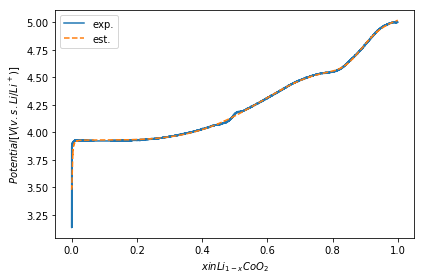

In [19]:
#グラフ描写
#1 Figureのインスタンス作成
import matplotlib.pyplot as plt
fig = plt.figure() #figsize=(16,9))
print("type(fig): {}".format(type(fig))) #わからん

#2 Axesのインスタンス作成
#ax3 = fig.add_subplot(121)
ax1 = fig.add_subplot(111)

#3 データを渡してプロット
ax1.plot(x, ocv_raw['Potential(V)'], label='exp.')
ax1.plot(x, ocv_raw['est_V'], label='est.', linestyle="dashed")

ax1.set_xlabel("$x in Li_{1-x}CoO_2$")
ax1.set_ylabel("$Potential [V (v.s. Li/Li^+)]$")

ax1.legend()

fig.tight_layout() #かぶり

plt.show()
#ax2.plot(x, trajectories)